In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from konlpy.utils import partition
import re

# 데이터 가져오기

In [2]:
train=pd.read_csv('data/train.hate.csv')

In [3]:
dev=pd.read_csv('data/dev.hate.csv')

In [4]:
test=pd.read_csv('data/test.hate.no_label.csv')

In [5]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  471 non-null    object
 1   label     471 non-null    object
dtypes: object(2)
memory usage: 7.5+ KB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7896 entries, 0 to 7895
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  7896 non-null   object
 1   label     7896 non-null   object
dtypes: object(2)
memory usage: 123.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  974 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [8]:
train=pd.concat([train,dev])  #7896:

In [9]:
train

,comments,label
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,hate
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,none
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",hate
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",none
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,hate
...,...,...
466,지현우 범죄 저지르지 않았나요?,offensive
467,여자인생 망칠 일 있나 ㅋㅋ,hate
468,근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,offensive
469,"할매젖x, 뱃살x, 몸매 s라인, 유륜은 적당해야됨(너무크거나 너무 작아도 x), ...",hate


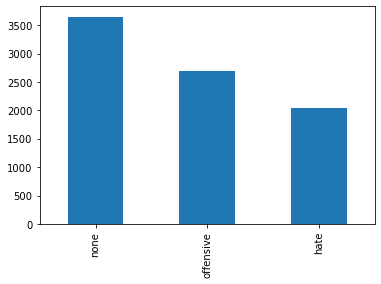

In [10]:
train['label'].value_counts()
train['label'].value_counts().plot(kind='bar')

In [11]:
train['label_band']=train['label'].map({'none':0,'offensive':1,'hate':2})

In [12]:
train.head()

,comments,label,label_band
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,hate,2
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,none,0
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",hate,2
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",none,0
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,hate,2


# 데이터 전처리

In [13]:
wordDict={"[\W+]":" ",'[\d+]':' ','[ㅡ+]':'','[ㅠ+]':'','[ㅜ+]':'','[ㄱ-ㅎ]':'','ᆢᆢ':''}

In [14]:
for i,j in wordDict.items():
    train['comments']=train.comments.str.replace(i,j)

In [15]:
# def cw(x):
#     simdict={'추카':'축하'}
#     for index,word in simdict.items():
#         return re.sub(index,word,x)

In [16]:
# train['comments']=train.comments.apply(cw)

### 문자=> 숫자 (단어 길이와 빈도수를 조절)

In [17]:
n=2  #단어 길이
m=3  # 빈도수

In [18]:
okt=Okt()
wordList=[]
word_index={}
wordCount={}
train['corpus']=0
for index ,sentencs in enumerate(train.comments):
    words=okt.morphs(sentencs,stem=True)
    train['corpus'].iloc[index]=words
    for word in words:
        if len(word) >= n:
            if word not in wordList:
                wordCount[word]=1
                wordList.append(word)
            else:
                wordCount[word]=wordCount[word]+1
wordList=[]                
for words in train['corpus']:
    for word in words:
        if len(word) >=n:
            if wordCount[word] >= m:
                if word not in wordList:
                    word_index[word]=len(wordList)
                    wordList.append(word)

C:\Users\i\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
train

,comments,label,label_band,corpus
0,현재 호텔주인 심정 아 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,hate,2,"[현재, 호텔, 주인, 심정, 아, 난, 마른하늘, 에, 날벼락, 맞다, 호텔, 망..."
1,한국적인 미인의 대표적인 분 너무나 곱고아름다운모습 그모습뒤의 슬픔을...,none,0,"[한국, 적, 인, 미인, 의, 대표, 적, 인, 분, 너무나, 곱, 고, 아름답다..."
2,못된 넘들 남의 고통을 즐겼던 넘들 이젠 마땅한 처벌을 받아야지 그래...,hate,2,"[못, 되다, 넘다, 들다, 남, 의, 고통, 을, 즐기다, 넘다, 들다, 이, 젠..."
3,화 어설펐는데 화 지나서부터는 갈수록 너무 재밌던데,none,0,"[화, 어설프다, 화, 지나다, 갈수록, 너무, 재밌다]"
4,사람 얼굴 손톱으로 긁은것은 인격살해이고 동영상이 몰카냐 메걸리안들 생각...,hate,2,"[사람, 얼굴, 손톱, 으로, 긁다, 인격, 살해, 이고, 동영상, 이, 몰카, 냐..."
...,...,...,...,...
466,지현우 범죄 저지르지 않았나요,offensive,1,"[지현우, 범죄, 저지르다, 않다]"
467,여자인생 망칠 일 있나,hate,2,"[여자, 인생, 망치다, 일, 있다]"
468,근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는,offensive,1,"[근데, 전라도, 에서, 사고, 가, 나다, 굳이, 서울, 까지, 오다, 병원, 에..."
469,할매젖x 뱃살x 몸매 s라인 유륜은 적당해야됨 너무크거나 너무 작아도 x ...,hate,2,"[하다, 젖, x, 뱃살, x, 몸매, s, 라인, 유륜, 은, 적당하다, 되다, ..."


In [20]:
print(sorted(word_index.keys()))

['BTS', 'JTBC', 'JYP', 'KBS', 'OOO', 'SM', 'SNS', 'TV', 'YG', 'aoa', 'bj', 'bts', 'bye', 'cf', 'com', 'https', 'jk', 'jyp', 'kbs', 'kg', 'mbc', 'mc', 'ost', 'sm', 'sns', 'to', 'tv', 'tvN', 'vs', 'xx', 'yg', '가가', '가게', '가격', '가관', '가기', '가꾸다', '가끔', '가나', '가난하다', '가늘다', '가능', '가능성', '가능하다', '가다', '가도', '가득', '가득하다', '가든', '가라', '가로세로', '가루', '가르다', '가르치다', '가리다', '가만있다', '가만히', '가면', '가버리다', '가볍다', '가보', '가보다', '가사', '가세', '가수', '가슴', '가시다', '가식', '가야', '가요', '가요무대', '가운데', '가장', '가정', '가정사', '가져오다', '가족', '가즈', '가지', '가지가지', '가지다', '가짜', '가치관', '가하다', '가해자', '가희', '각자', '간다', '간만', '간이', '간지', '갈구다', '갈다', '갈라', '갈리다', '갈수', '갈수록', '갈아', '감다', '감당', '감독', '감동', '감사', '감사하다', '감성', '감싸다', '감옥', '감정', '감정이입', '감추다', '감탄', '감흥', '감히', '갑자기', '강간', '강남', '강성훈', '강아지', '강요', '강용석', '강은비', '강제', '강지환', '강타', '강하늘', '강하다', '강한나', '강호동', '갖다', '갖추다', '같다', '같이', '같잖다', '갚다', '개고기', '개국', '개그', '개그맨', '개그우먼', '개극혐', '개꿀잼', '개념', '개다', '개돼지', '개론', '개막', '개멋', '개무시', '개발', '개뿔', '개성', '개월', '개이

### Document Term Matrix

In [21]:
trainarray=[]
for corpus in train.corpus:
    temp=[0]*len(word_index)
    for word in corpus:
        if word in word_index.keys():
            temp[word_index[word]]=+1
    trainarray.append(temp)

In [22]:
dtm=pd.DataFrame(trainarray,columns=word_index.keys())

In [23]:
dtm.shape

(8367, 3978)

### one hot encoding

In [24]:
trainarray=[]
for corpus in train.corpus:
    temp=[0]*len(word_index)
    for word in corpus:
        if word in word_index.keys():
            temp[word_index[word]]=1
    trainarray.append(temp)

In [25]:
ohe=pd.DataFrame(trainarray,columns=word_index.keys())

In [26]:
ohe.shape

(8367, 3978)

In [27]:
xTrain=ohe.values
yTrain=train['label_band'].values

In [28]:
testarray=[]
test['corpus']=0
for index ,sentencs in enumerate(test.comments):
    words=okt.morphs(sentencs,stem=True)
    test['corpus'].iloc[index]=words
    temp=[0]*len(word_index)
    for word in words:
        if word in word_index.keys():
            temp[word_index[word]]=1
    testarray.append(temp)  
xTest=testarray

C:\Users\i\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### naive_bayes

In [29]:
from sklearn.naive_bayes import CategoricalNB

In [30]:
model=CategoricalNB()
model.fit(xTrain, yTrain)

CategoricalNB()

In [31]:
pred=model.predict(xTest)

In [33]:
model.score(xTrain , yTrain)

0.7295326879407195

In [36]:
test['label']=pred
submit=test[['comments','label']]

In [37]:
submit.to_csv('submit.csv',index=False)

### 신경망

In [69]:
from keras.models import Sequential 
from keras.layers import Dense
from keras import optimizers

In [94]:
model=Sequential()
model.add(Dense(64,input_shape=(xTrain.shape[1],) ,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [95]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [96]:
yTrain_ohe=pd.get_dummies(train['label']).values

In [97]:
x_val = xTrain[:1000]
partial_x_train = xTrain[1000:]

y_val = yTrain_ohe[:1000]
partial_y_train = yTrain_ohe[1000:]

In [98]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
15/15 [==============================] - 2s 108ms/step - loss: 1.0612 - accuracy: 0.4349 - val_loss: 1.0355 - val_accuracy: 0.4280
Epoch 2/20
15/15 [==============================] - 0s 18ms/step - loss: 0.9389 - accuracy: 0.5605 - val_loss: 0.9566 - val_accuracy: 0.5440
Epoch 3/20
15/15 [==============================] - 0s 19ms/step - loss: 0.8062 - accuracy: 0.6738 - val_loss: 0.9100 - val_accuracy: 0.5690
Epoch 4/20
15/15 [==============================] - 0s 18ms/step - loss: 0.6958 - accuracy: 0.7303 - val_loss: 0.8989 - val_accuracy: 0.5870
Epoch 5/20
15/15 [==============================] - 0s 18ms/step - loss: 0.6027 - accuracy: 0.7710 - val_loss: 0.9133 - val_accuracy: 0.5880
Epoch 6/20
15/15 [==============================] - 0s 18ms/step - loss: 0.5233 - accuracy: 0.8063 - val_loss: 0.9373 - val_accuracy: 0.5870
Epoch 7/20
15/15 [==============================] - 0s 18ms/step - loss: 0.4551 - accuracy: 0.8385 - val_loss: 0.9943 - val_accuracy: 0.5970
Epoch 8/20
1

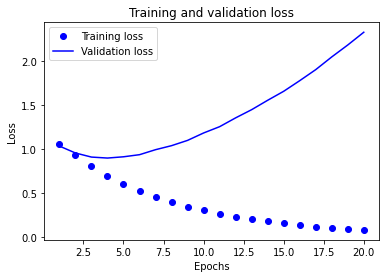

In [99]:
loss= history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo',label="Training loss" )
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [111]:
pred=model.predict(xTest)

In [113]:
predict=[]
for i in pred:
    predict.append(i.argmax())

In [116]:
test['label']=predict

In [117]:
submit=test[['comments','label']]

In [118]:
submit.to_csv('submit.csv',index=False)

In [119]:
test

,comments,corpus,label
0,ㅋㅋㅋㅋ 그래도 조아해주는 팬들 많아서 좋겠다 ㅠㅠ 니들은 온유가 안만져줌 ㅠㅠ,"[ㅋㅋㅋㅋ, 그래도, 조아하다, 팬, 들, 많다, 좋다, ㅠㅠ, 니, 들, 은, 온...",2
1,둘다 넘 좋다~행복하세요,"[두다, 넘다, 좋다, ~, 행복하다]",1
2,근데 만원이하는 현금결제만 하라고 써놓은집 우리나라에 엄청 많은데,"[근데, 만, 원, 이하, 는, 현금, 결제, 만, 하라, 고, 써다, 집, 우리나...",2
3,원곡생각하나도 안나고 러블리즈 신곡나온줄!!! 너무 예쁘게 잘봤어요,"[원, 곡, 생각, 하나, 도, 안나, 고, 러블, 리즈, 신곡, 나오다, !!!,...",1
4,장현승 얘도 참 이젠 짠하다...,"[장현승, 얘, 도, 차다, 이, 젠, 짠하다, ...]",1
...,...,...,...
969,대박 게스트... 꼭 봐야징~ 컨셉이 바뀌니깐 재미지넹,"[대박, 게스트, ..., 꼭, 보다, 징, ~, 컨셉, 이, 바뀌다, 재미, 지, 넹]",1
970,성형으로 다 뜯어고쳐놓고 예쁜척. 성형 전 니 얼굴 다 알고있다. 순자처럼 된장냄새...,"[성형, 으로, 다, 뜯다, 고치다, 예쁘다, 척, ., 성형, 전, 니, 얼굴, ...",2
971,분위기는 비슷하다만 전혀다른 전개던데 무슨ㅋㅋㄱ 우리나라사람들은 분위기만 비슷하면 ...,"[분위기, 는, 비슷하다, 전혀, 다른, 전개, 던데, 무슨, ㅋㅋㄱ, 우리나라, ...",1
972,입에 손가릭이 10개 있으니 징그럽다,"[입, 에, 손가릭, 이, 10, 개, 있다, 징그럽다]",0
